In [22]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [23]:
# Certifique-se de que você carregou e pré-processou seu DataFrame 
filepath = '../data/raw/data.csv'
df = pd.read_csv(filepath)

In [24]:
# Substitua estas colunas conforme necessário para o seu DataFrame específico
features = df.drop(columns=['Fluxo de Caixa Líquido (R$)', 'Ano/Mês', 'Observações'])  # Mudança aqui
target = df['Fluxo de Caixa Líquido (R$)'] 


In [25]:
# Dividindo o DataFrame em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
# Certifique-se de que os conjuntos de dados não estão vazios ou nulos
if not X_train.empty and not y_train.empty:
    # Criando e treinando um modelo de Regressão Florestal Aleatória
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Fazendo previsões
    predictions = model.predict(X_test)

    # Calculando o erro absoluto médio
    mae = mean_absolute_error(y_test, predictions)
    print(f'Mean Absolute Error: {mae}')
else:
    print("Erro: Os dados de treinamento não foram carregados corretamente.")

Mean Absolute Error: 1131.4


d:\projetos\projetos-data-science\Fluxo-Caixa-Predictive-Python\fluxo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\projetos\projetos-data-science\Fluxo-Caixa-Predictive-Python\fluxo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\projetos\projetos-data-science\Fluxo-Caixa-Predictive-Python\fluxo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\projetos\projetos-data-science\Fluxo-Caixa-Predictive-Python\fluxo\Lib\site-packages\seaborn\_

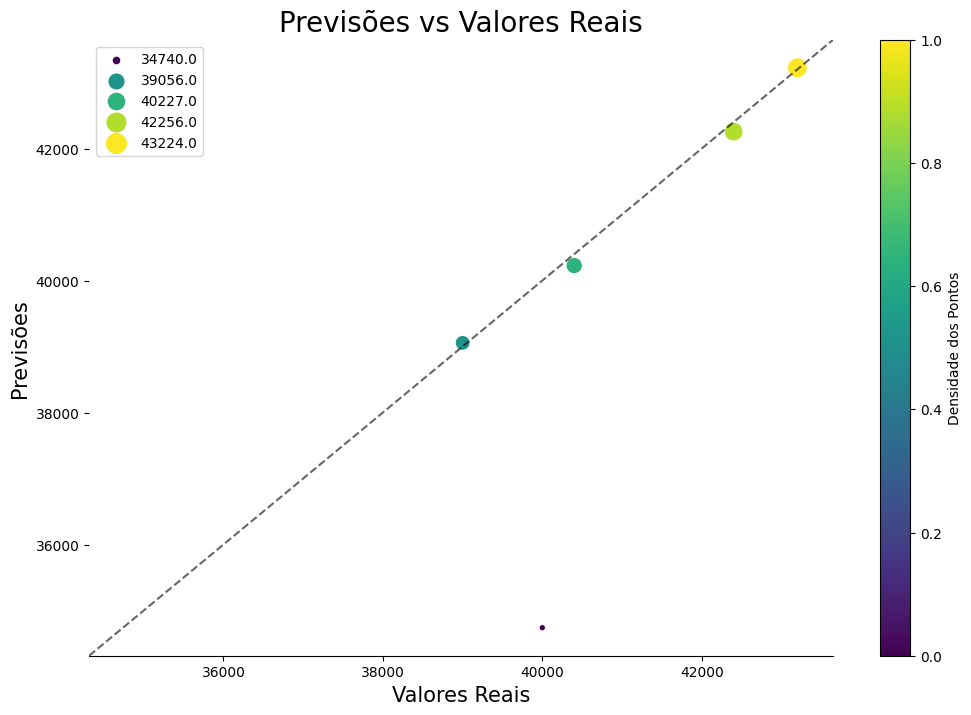

In [30]:
# Certifique-se de que os conjuntos de dados não estão vazios ou nulos
if not X_test.empty and predictions is not None:
    plt.figure(figsize=(12,8))
    
    # Cria um scatterplot com uma paleta de cores para representar a densidade dos pontos
    scatter = sns.scatterplot(x=y_test, y=predictions, hue=predictions, palette="viridis", size=predictions, sizes=(20, 200))
    
    # Adicionando labels e título
    plt.xlabel('Valores Reais', fontsize=15)
    plt.ylabel('Previsões', fontsize=15)
    plt.title('Previsões vs Valores Reais', fontsize=20)
    
    # Adicionando uma linha de identidade (y=x) para facilitar a visualização
    limits = [
        np.min([plt.xlim(), plt.ylim()]), 
        np.max([plt.xlim(), plt.ylim()]),  
    ]
    
    plt.plot(limits, limits, color='black', alpha=0.6, linestyle='--')
    plt.xlim(limits)
    plt.ylim(limits)
    
    # Melhorando a estética do gráfico
    sns.despine(left=True)
    
    # Adicionando uma legenda para explicar as cores
    plt.colorbar(scatter.collections[0], label="Densidade dos Pontos")
    
    plt.show()
else:
    print("Erro: Não foi possível gerar o gráfico devido a dados de teste ou previsões vazias.")
